# Test and visulaize best model

Best model out of the four models is custom3.
* load test dataset
* visualize test datset
* load model
* run model on the test batch
* visulaize results

## Imports

In [1]:
import pathlib
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Load dataset

In [2]:
dataset_dir = pathlib.Path("../phi_dataset/")
model_dir = pathlib.Path('../phi_models/')
checkpoint_dir = pathlib.Path('../phi_checkpoints/')

In [3]:
os.listdir(dataset_dir)

['phishing', 'trusted_list']

### Params

In [4]:
model_name = "custom3"
batch_size = 16
img_height = 256
img_width = 512 

rest_split_ratio = 0.2
test_split_ratio = 0.2

### init dataset objects and splits

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_dir,
  validation_split=rest_split_ratio,
  subset="training",
  label_mode = 'binary',
  seed=132,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10541 files belonging to 2 classes.
Using 8433 files for training.


In [6]:
rest_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_dir,
  validation_split=rest_split_ratio,
  subset="validation",
  label_mode='binary',
  seed=132,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10541 files belonging to 2 classes.
Using 2108 files for validation.


In [7]:
rest_batches = rest_ds.cardinality().numpy()
print(rest_batches)

132


In [8]:
val_ds = rest_ds.skip(int(rest_batches * test_split_ratio // batch_size))
test_ds = rest_ds.take(int(rest_batches * test_split_ratio // batch_size))

In [9]:
class_names = train_ds.class_names

In [10]:
class_names

['phishing', 'trusted_list']

## Visualize data

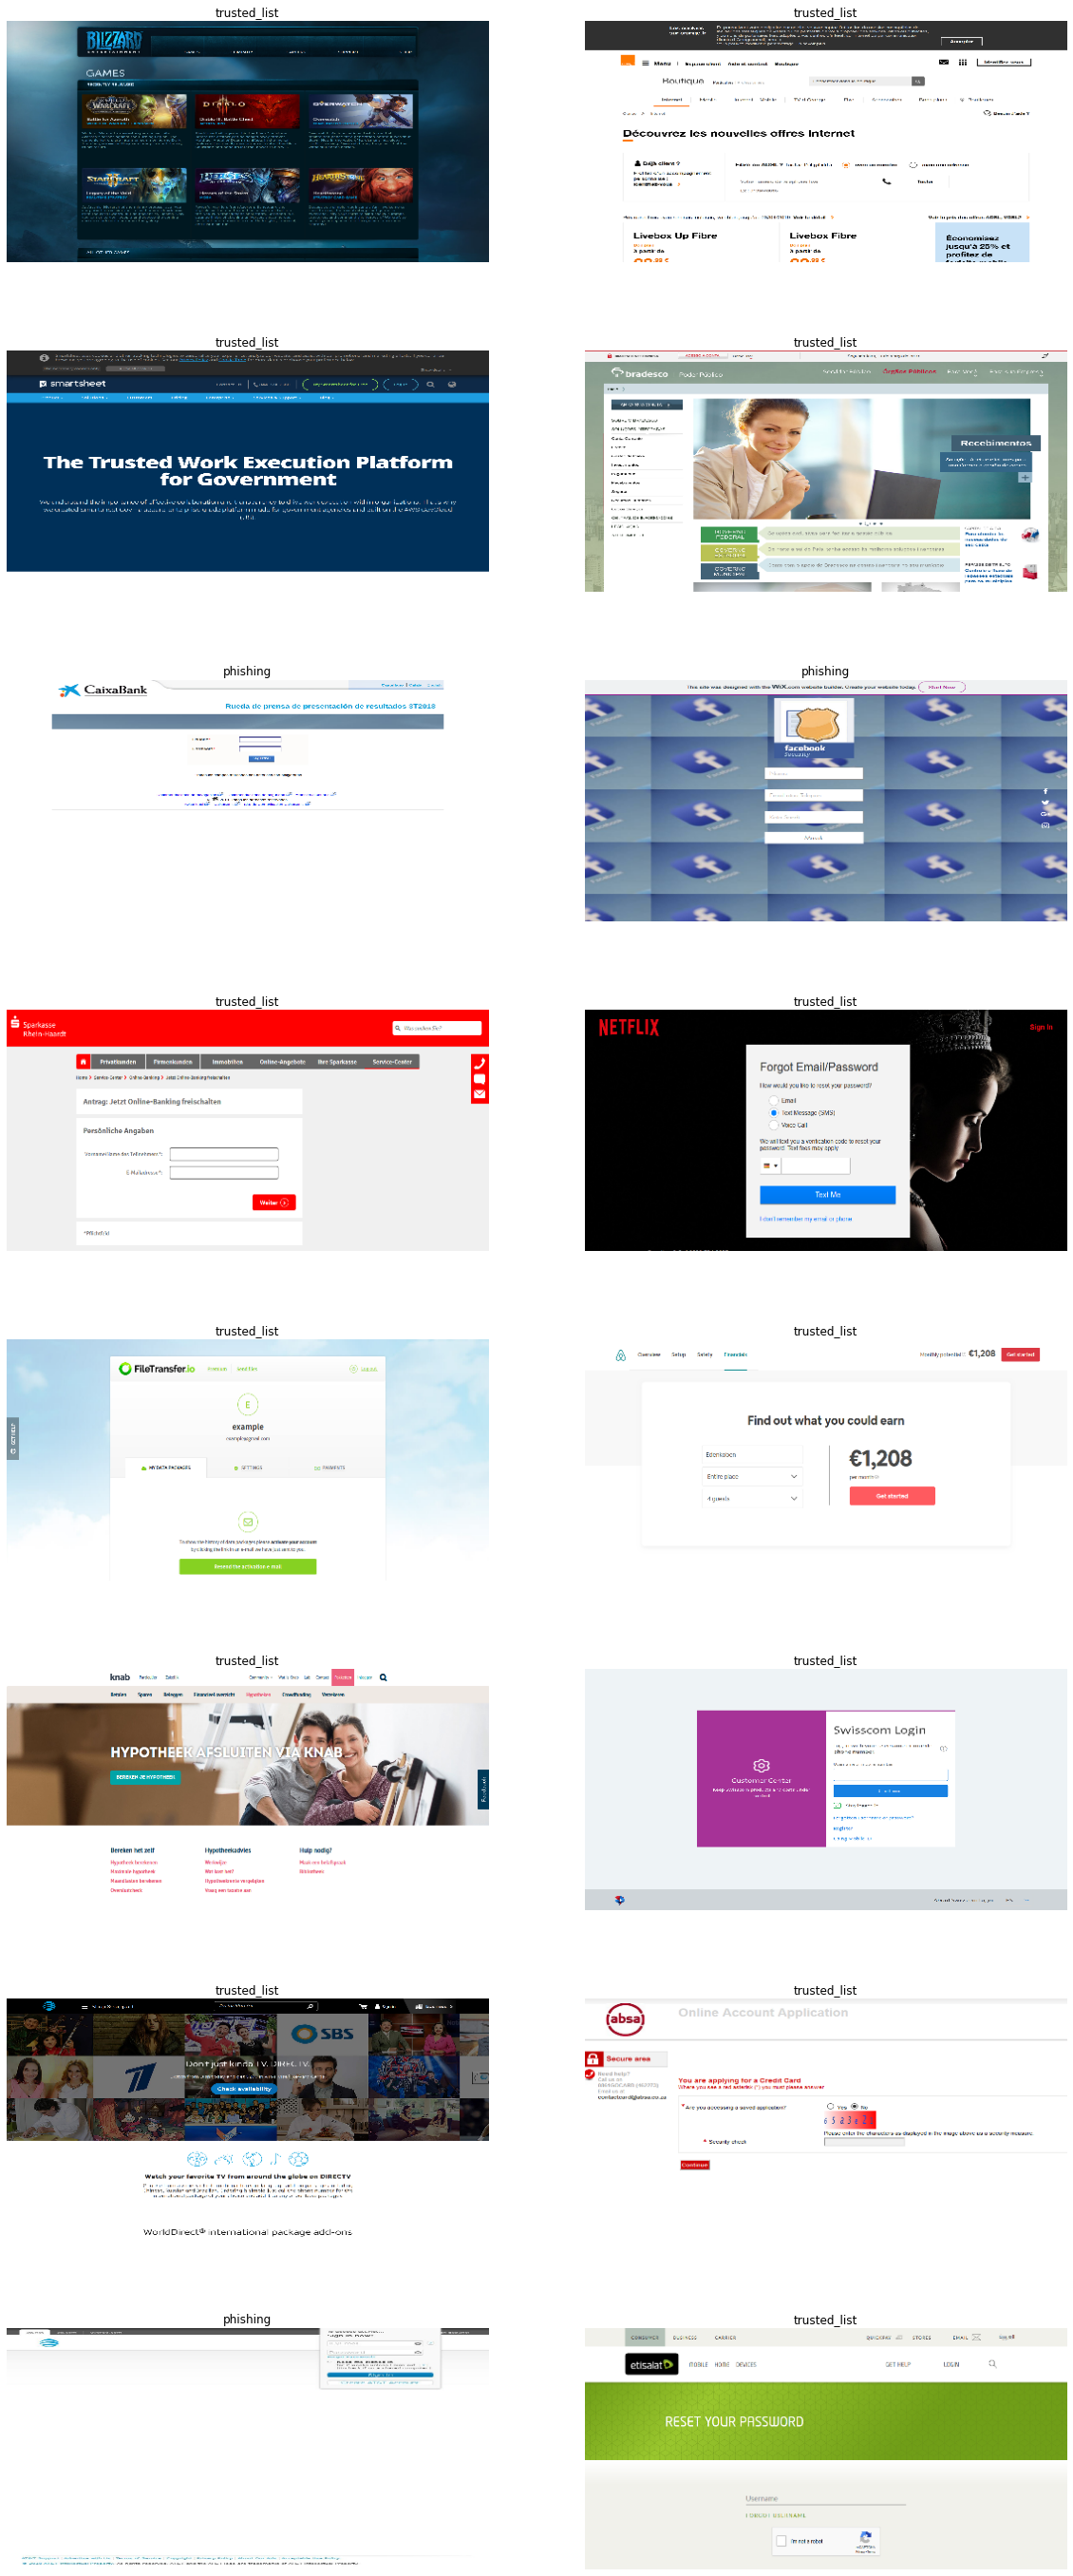

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 50))
for images, labels in test_ds.take(1):
    imgs = images
    class_labels = labels
    for i in range(16):
        ax = plt.subplot(8, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

## Load model (custom3)

In [12]:
# change filename to the model you want to load
model_filename = "2021-07-25_20;22;06.309418_custom3_valacc0.9350_e8_b16.tf"
model = keras.models.load_model(
    model_dir / model_filename,
    compile=True)

## Evaluate (test)

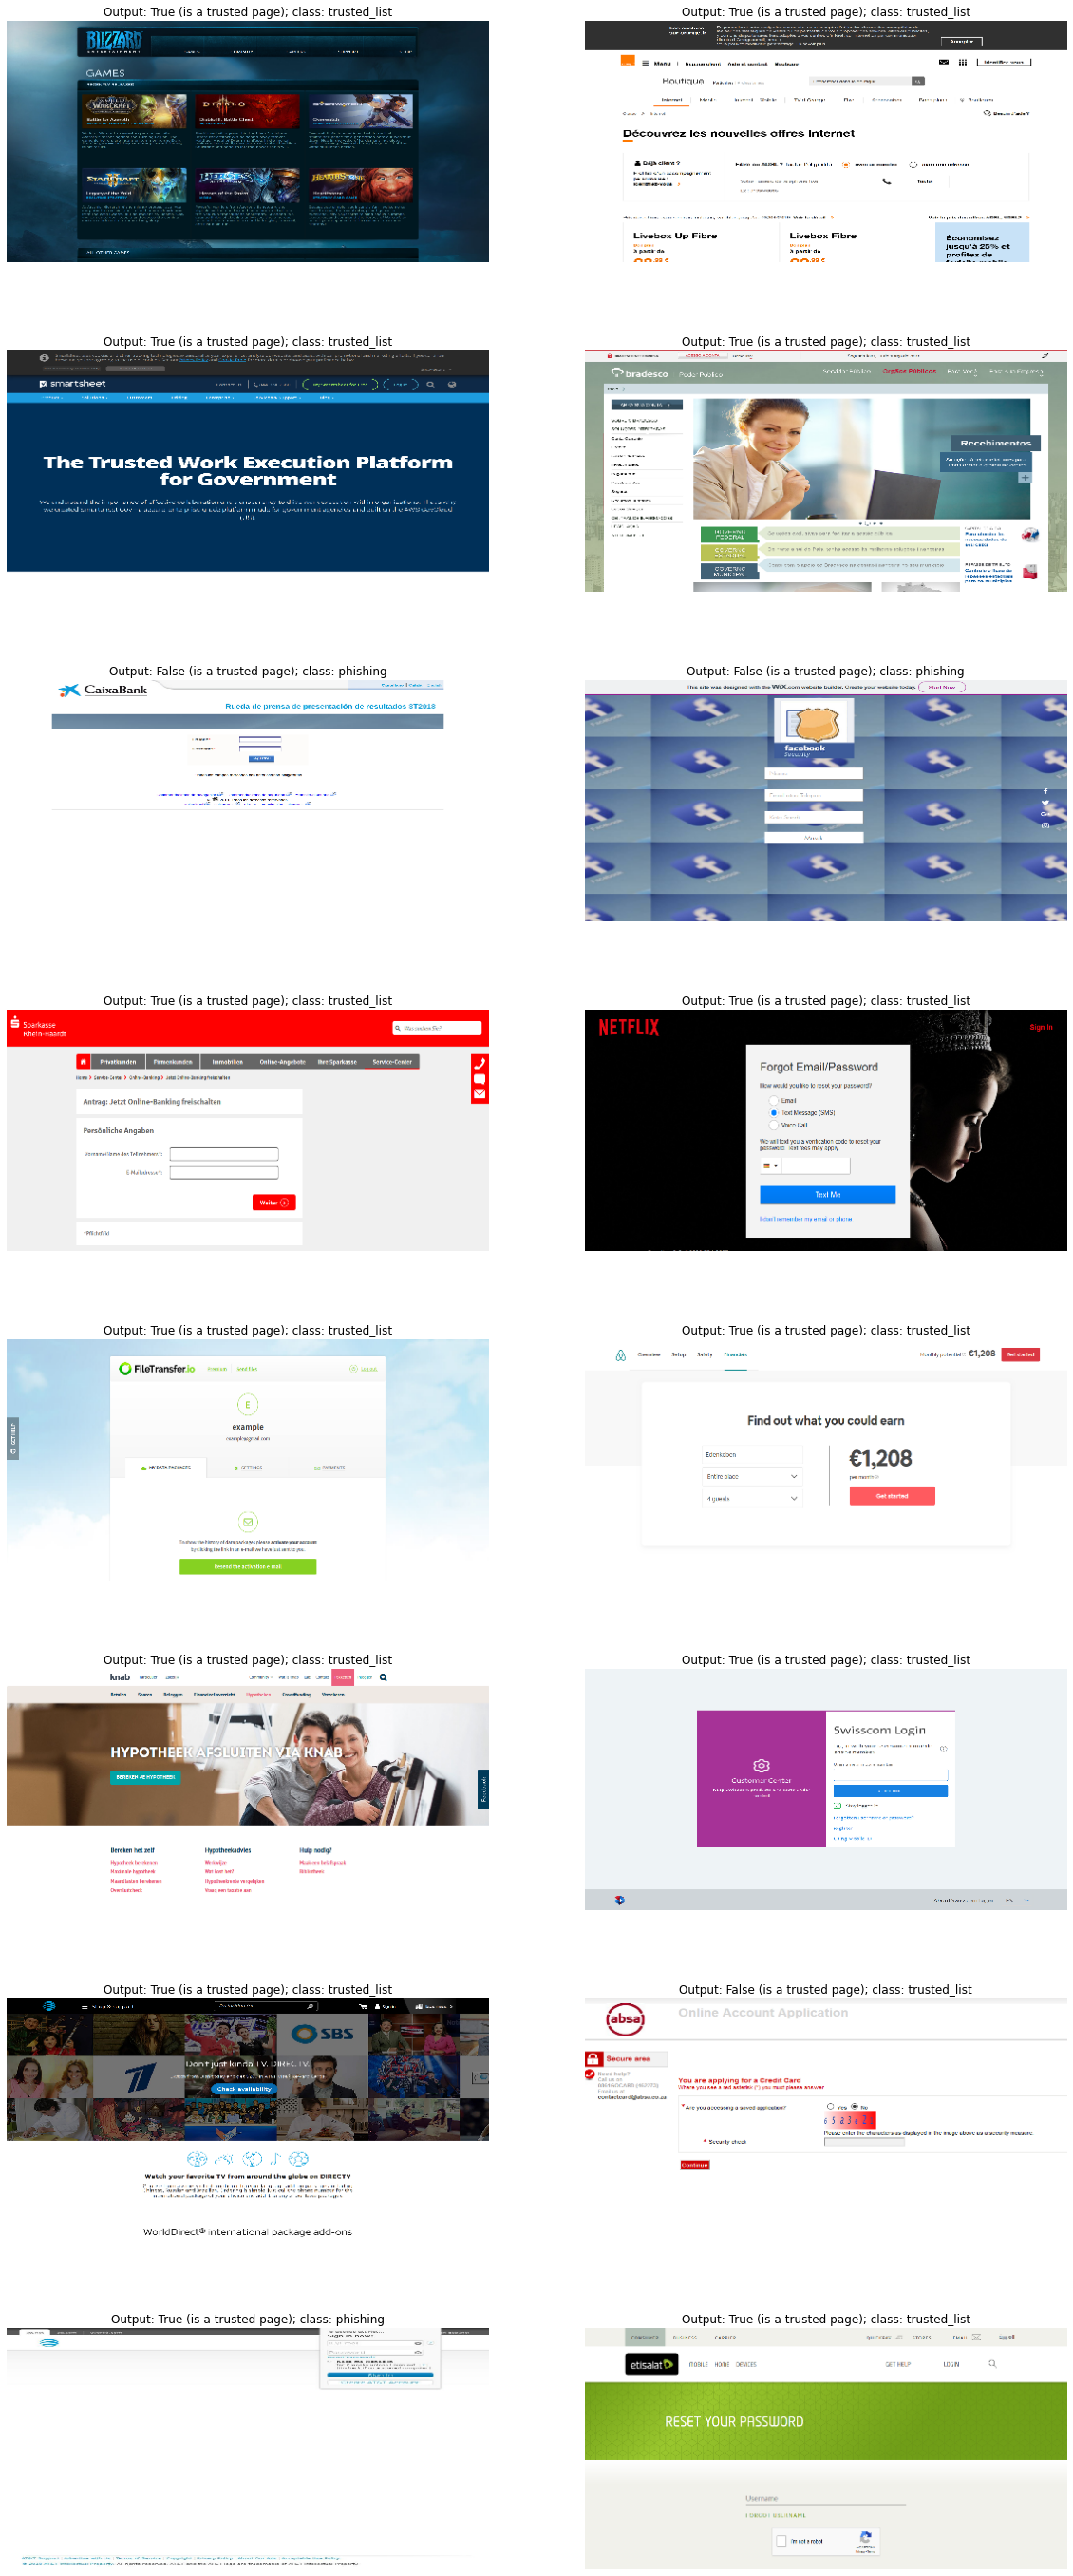

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 50))
pred = (model.predict(imgs) > 0.5)
for i in range(16):
    ax = plt.subplot(8, 2, i + 1)
    plt.imshow(imgs[i].numpy().astype("uint8"))
    plt.title(f"Output: {pred[i][0]} (is a trusted page); class: {class_names[int(class_labels[i])]}")
    plt.axis("off")

In [14]:
test_results = model.evaluate(test_ds, batch_size=16)
print("test loss, test acc:", test_results)

1/1 [==============================] - 1s 1s/step - loss: 0.0384 - accuracy: 0.9375
test loss, test acc: [0.03844225034117699, 0.9375]
